<a href="https://colab.research.google.com/github/DeepshikhaSingh1996/Multi_Linear_Regression_Assignment.ipynb/blob/main/Copy_of_Copy_of_Copy_of_Copy_of_Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df=pd.read_csv('50_Startups.csv')

In [6]:
df

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R_D_Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
df.dtypes

R_D_Spend          float64
Administration     float64
Marketing_Spend    float64
State               object
Profit             float64
dtype: object

In [9]:
df.columns

Index(['R_D_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [10]:
df.shape

(50, 5)

In [12]:
df.ndim

2

In [13]:
df.axes

[RangeIndex(start=0, stop=50, step=1),
 Index(['R_D_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')]

In [14]:
df.values

array([[165349.2, 136897.8, 471784.1, 'New York', 192261.83],
       [162597.7, 151377.59, 443898.53, 'California', 191792.06],
       [153441.51, 101145.55, 407934.54, 'Florida', 191050.39],
       [144372.41, 118671.85, 383199.62, 'New York', 182901.99],
       [142107.34, 91391.77, 366168.42, 'Florida', 166187.94],
       [131876.9, 99814.71, 362861.36, 'New York', 156991.12],
       [134615.46, 147198.87, 127716.82, 'California', 156122.51],
       [130298.13, 145530.06, 323876.68, 'Florida', 155752.6],
       [120542.52, 148718.95, 311613.29, 'New York', 152211.77],
       [123334.88, 108679.17, 304981.62, 'California', 149759.96],
       [101913.08, 110594.11, 229160.95, 'Florida', 146121.95],
       [100671.96, 91790.61, 249744.55, 'California', 144259.4],
       [93863.75, 127320.38, 249839.44, 'Florida', 141585.52],
       [91992.39, 135495.07, 252664.93, 'California', 134307.35],
       [119943.24, 156547.42, 256512.92, 'Florida', 132602.65],
       [114523.61, 122616.84, 261

In [15]:
df.shape[1]

5

In [16]:
df.shape[0]

50

In [17]:
df.size

250

In [18]:
# Data Frame Methods

In [19]:
df.columns

Index(['R_D_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [20]:
df.describe()

,R_D_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [21]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


R_D_Spend           73721.6156
Administration     121344.6396
Marketing_Spend    211025.0978
Profit             112012.6392
dtype: float64

In [22]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


R_D_Spend           73051.080
Administration     122699.795
Marketing_Spend    212716.240
Profit             107978.190
dtype: float64

In [23]:
df.count()


R_D_Spend          50
Administration     50
Marketing_Spend    50
State              50
Profit             50
dtype: int64

In [24]:
# Mean for top 50 rows

df_50rows = df.head(50)
df_50rows
df_50rows.shape

(50, 5)

In [25]:
df_50rows.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


R_D_Spend           73721.6156
Administration     121344.6396
Marketing_Spend    211025.0978
Profit             112012.6392
dtype: float64

In [26]:
df.head(50).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


R_D_Spend           73721.6156
Administration     121344.6396
Marketing_Spend    211025.0978
Profit             112012.6392
dtype: float64

In [27]:
df['Profit']

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [28]:
df[['Profit']]

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [29]:
df.Profit.describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

In [30]:
df.Profit.count()
df['Profit'].count()

50

In [31]:
# Data Frames group by method

In [32]:
df_rank=df.groupby(['State'])
df_rank.mean()

,R_D_Spend,Administration,Marketing_Spend,Profit
State,,,,
California,64657.674118,120746.507059,182540.929412,103905.175294
Florida,80724.016250,121768.897500,247323.551250,118774.024375
New York,76195.062353,121543.470588,205346.015882,113756.446471


In [33]:
df_rank=df.groupby('State')[['Profit']]
df_rank.mean()

,Profit
State,
California,103905.175294
Florida,118774.024375
New York,113756.446471


In [34]:
df.groupby(['State'],sort=False)[['Profit']].mean()

,Profit
State,
New York,113756.446471
California,103905.175294
Florida,118774.024375


In [35]:
#filtering

In [36]:
df[df['Profit']>150000]

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77


In [38]:
df[df['State']=="California"]

,R_D_Spend,Administration,Marketing_Spend,State,Profit
1,162597.70,151377.59,443898.53,California,191792.06
6,134615.46,147198.87,127716.82,California,156122.51
9,123334.88,108679.17,304981.62,California,149759.96
11,100671.96,91790.61,249744.55,California,144259.40
13,91992.39,135495.07,252664.93,California,134307.35
16,78013.11,121597.55,264346.06,California,126992.93
20,76253.86,113867.30,298664.47,California,118474.03
25,64664.71,139553.16,137962.62,California,107404.34
32,63408.86,129219.61,46085.25,California,97427.84
34,46426.07,157693.92,210797.67,California,96712.80


In [39]:
df[(df['State']=="California") & (df['Profit']>100000)]

,R_D_Spend,Administration,Marketing_Spend,State,Profit
1,162597.70,151377.59,443898.53,California,191792.06
6,134615.46,147198.87,127716.82,California,156122.51
9,123334.88,108679.17,304981.62,California,149759.96
11,100671.96,91790.61,249744.55,California,144259.40
13,91992.39,135495.07,252664.93,California,134307.35
16,78013.11,121597.55,264346.06,California,126992.93
20,76253.86,113867.30,298664.47,California,118474.03
25,64664.71,139553.16,137962.62,California,107404.34


In [37]:
df.iloc[0:4]

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99


In [40]:
df.iloc[2:7]

,R_D_Spend,Administration,Marketing_Spend,State,Profit
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51


In [41]:
df.iloc[:,-3:]

,Marketing_Spend,State,Profit
0,471784.10,New York,192261.83
1,443898.53,California,191792.06
2,407934.54,Florida,191050.39
3,383199.62,New York,182901.99
4,366168.42,Florida,166187.94
5,362861.36,New York,156991.12
6,127716.82,California,156122.51
7,323876.68,Florida,155752.60
8,311613.29,New York,152211.77
9,304981.62,California,149759.96


In [42]:
df.iloc[1:8,0:3]

,R_D_Spend,Administration,Marketing_Spend
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68


In [43]:
df[['R_D_Spend','Administration','Marketing_Spend']].agg(['min','max','mean'])

,R_D_Spend,Administration,Marketing_Spend
min,0.0000,51283.1400,0.0000
max,165349.2000,182645.5600,471784.1000
mean,73721.6156,121344.6396,211025.0978


In [44]:
df[['R_D_Spend','Administration','Marketing_Spend','Profit']]

,R_D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [45]:
#check for missing values
df.isna().sum()

R_D_Spend          0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [46]:
# Correlation Matrix

In [47]:
df.corr()

,R_D_Spend,Administration,Marketing_Spend,Profit
R_D_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [48]:
#Scatterplot between variables along with histograms

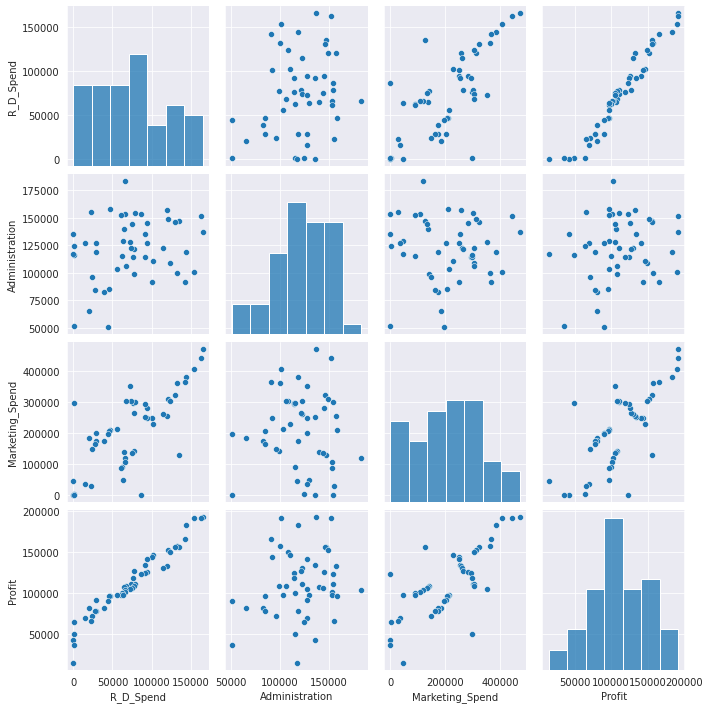

In [50]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [51]:
# preparing a model

In [52]:
#Build model
model = smf.ols("Profit~Administration+Marketing_Spend+R_D_Spend",data=df).fit()


In [53]:
# Coefficients
model.params

Intercept          50122.192990
Administration        -0.026816
Marketing_Spend        0.027228
R_D_Spend              0.805715
dtype: float64

In [54]:
#t and p-Values
print(model.tvalues,'\n',model.pvalues)

Intercept           7.626218
Administration     -0.525507
Marketing_Spend     1.655077
R_D_Spend          17.846374
dtype: float64 
 Intercept          1.057379e-09
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
R_D_Spend          2.634968e-22
dtype: float64


In [55]:
#R Squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [56]:
#Simple Linear Regression Models
ml_v=smf.ols('Profit~R_D_Spend',data=df).fit()
#t and p_Values
print(ml_v.tvalues,'\n',ml_v.pvalues)

Intercept    19.320288
R_D_Spend    29.151139
dtype: float64 
 Intercept    2.782697e-24
R_D_Spend    3.500322e-32
dtype: float64


In [57]:
ml_v=smf.ols('Profit~Marketing_Spend',data=df).fit()
#t and p_Values
print(ml_v.tvalues,'\n',ml_v.pvalues)

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


In [58]:
ml_v=smf.ols('Profit~Administration',data=df).fit()
#t and p_Values
print(ml_v.tvalues,'\n',ml_v.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [59]:
# Calcilating VIF
rsq_ad=smf.ols('Administration~Marketing_Spend+R_D_Spend',data=df).fit().rsquared
vif_ad=1/(1-rsq_ad)

rsq_ma=smf.ols('Marketing_Spend~Administration+R_D_Spend',data=df).fit().rsquared
vif_ma=1/(1-rsq_ma)

rsq_rd=smf.ols('R_D_Spend~Marketing_Spend+Administration',data=df).fit().rsquared
vif_rd=1/(1-rsq_rd)

#Storing vif values in a data frame
d1 = {'Variable':['R_D_Spend','Marketing_Spend','Administration'],'VIF':[vif_ad,vif_ma,vif_rd]}
vif_frame=pd.DataFrame(d1)
vif_frame

,Variable,VIF
0,R_D_Spend,1.175091
1,Marketing_Spend,2.326773
2,Administration,2.468903


In [60]:
#Residual Analysis
#Test for Normality of Residuals (Q_Q Plot)

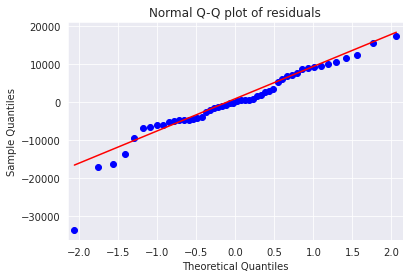

In [61]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [62]:
list(np.where(model.resid>15000))

[array([36, 45])]

In [63]:
#Residual Plot for Homoscedasticity

In [64]:
def get_standardized_values(vals):
  return (vals - vals.mean())/vals.std()

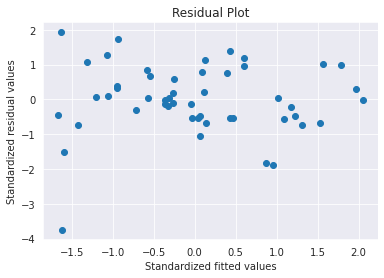

In [65]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [66]:
#Residual Vs Regressors

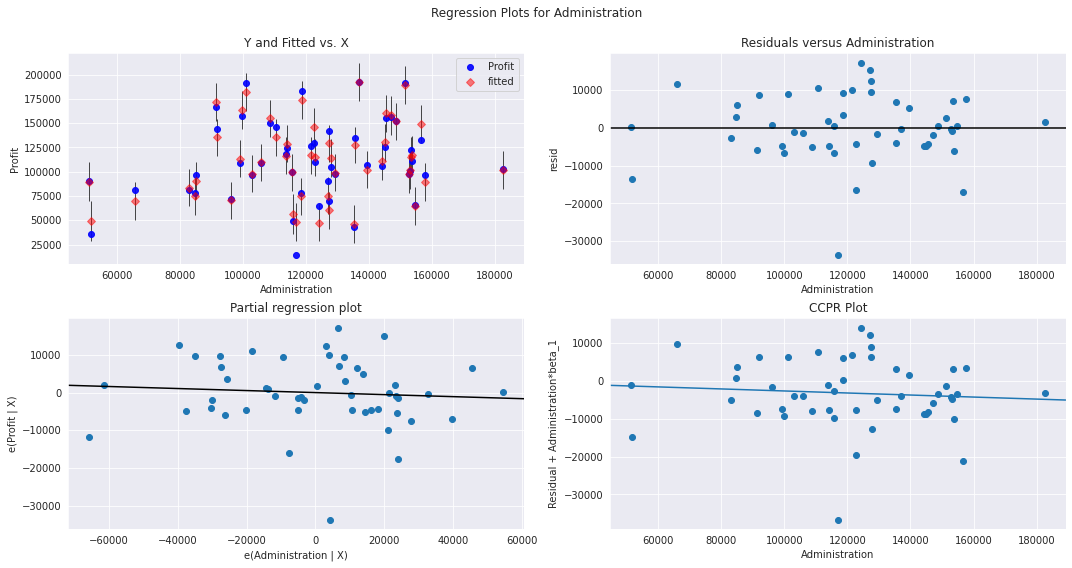

In [67]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Administration",fig=fig)
plt.show()

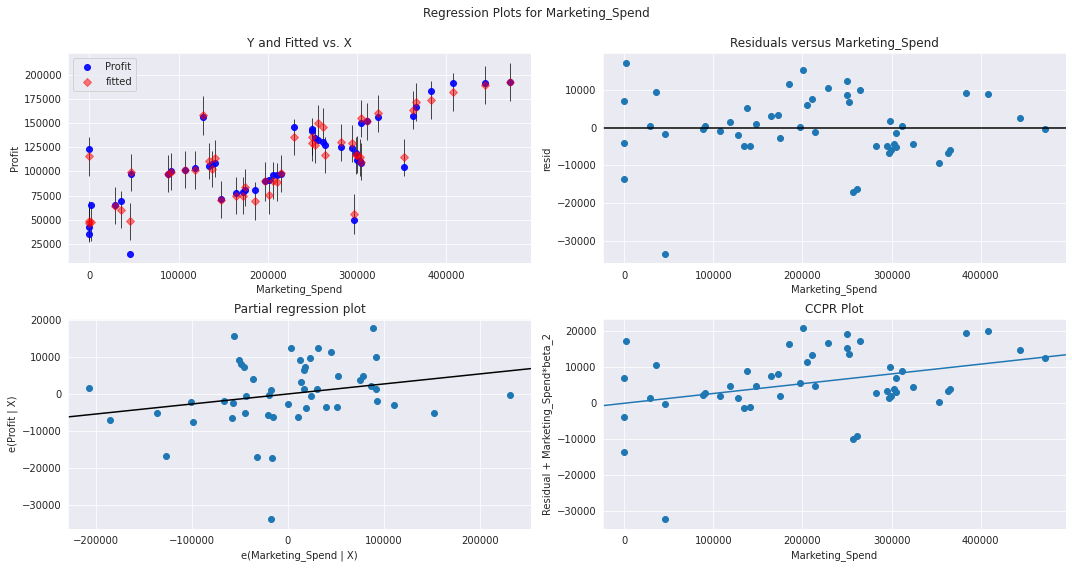

In [68]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Marketing_Spend",fig=fig)
plt.show()

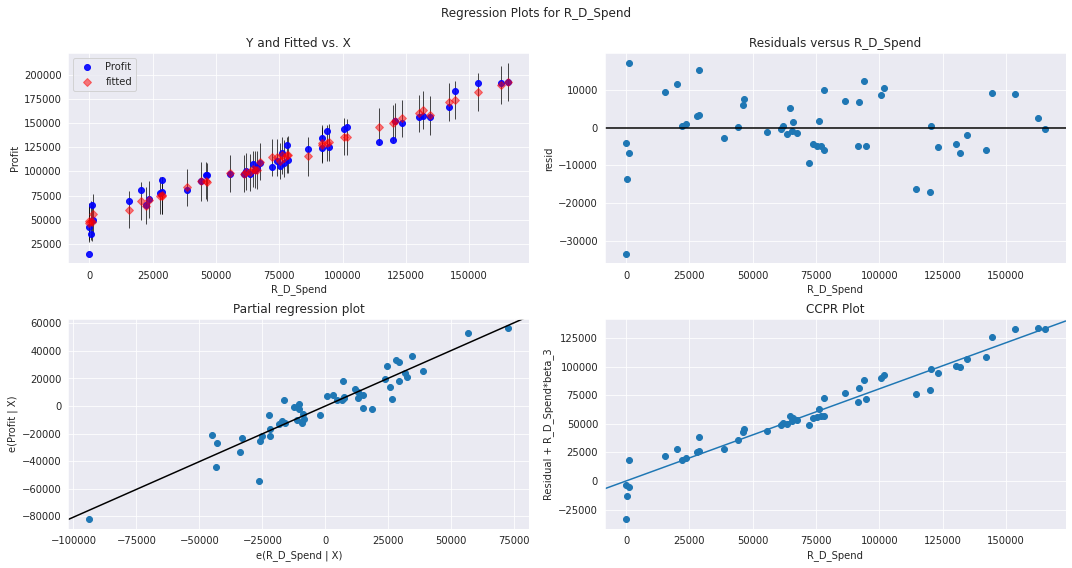

In [69]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"R_D_Spend",fig=fig)
plt.show()

In [70]:
#Model Deletion Diagnostics
#Delecting Influencers/Outliers

In [71]:
# Cook's Distance

In [72]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


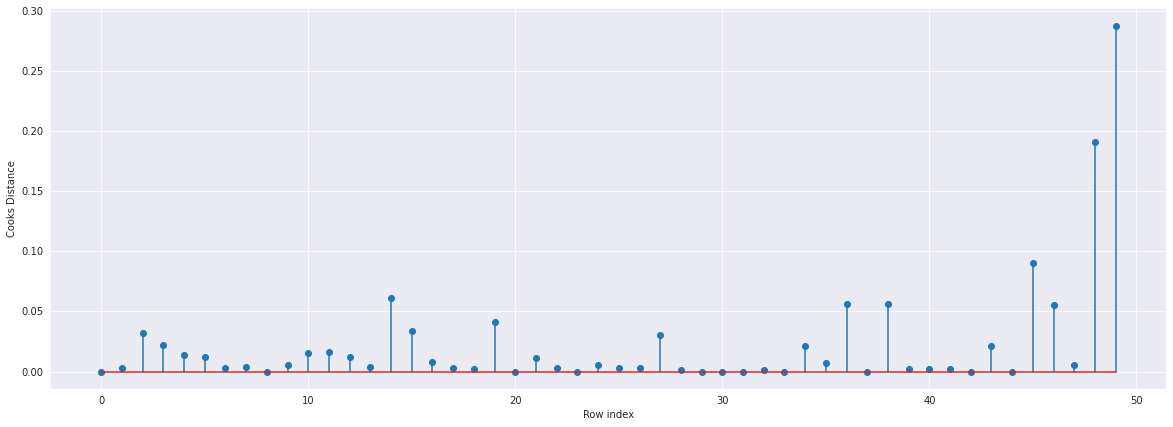

In [73]:
#Plot the influencers values using stem plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [74]:
#index and value of influencer where c is less than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432723)

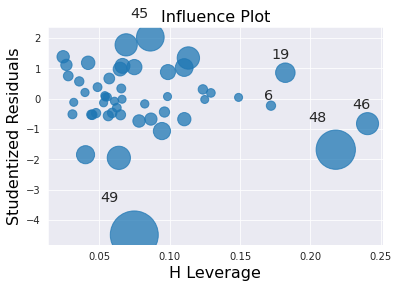

In [75]:
#High Influence points
influence_plot(model)
plt.show()

In [76]:
k=df.shape[1]
n=df.shape[0]
leverage_cutoff=3*((k+1)/n)
k
n
leverage_cutoff

0.36

In [77]:
# From the above plot, it is evident that data point 45 and 49 are the influencers

In [78]:
df[df.index.isin([45,49])]

,R_D_Spend,Administration,Marketing_Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
49,0.00,116983.80,45173.06,California,14681.40


In [79]:
# See the differences in Profit and other variable values
df.head()

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [80]:
df_new=pd.read_csv("50_Startups.csv")


In [81]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df1=df_new.drop(df_new.index[[45,49]],axis=0).reset_index()

In [82]:
#Drop the original index
df1=df1.drop(['index'],axis=1)

In [83]:
df1

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [84]:
# Build Model

In [85]:
# Exclude variable "
#profit and genrate R-Squared and AIC values
final_ml_v =smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data=df).fit()

In [86]:
(final_ml_v.rsquared,final_ml_v.aic,final_ml_v.bic)

(0.9507459940683246, 1058.7714985998055, 1066.419590621518)

In [87]:
#here,we can see the model is fitted property

In [88]:
#